In [1]:
import Encoder
import Decoder
from MQRNN import MQRNN 
from data import MQRNN_dataset,read_df
import pandas as pd
import numpy as np
from data import MQRNN_dataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
from train import train

In [2]:
config = {
    'horizon_size':30,
    'hidden_size':32,
    'quantiles': [0.1,0.3,0.5,0.7,0.9], 
    'columns': [1],
    'dropout': 1e-3,
    'layer_size':5,
    'b_direction':False,
    'lr': 1e-2,
    'batch_size': 1,
    'num_epochs':200,
    'context_size': 16,
}
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_target_df, test_target_df, train_covariate_df, test_covariate_df, mean_std = read_df(config)
config['covariate_size'] = train_covariate_df.shape[1]
config['device'] = device
train_target_df = train_target_df.to_numpy().reshape((-1,1))
test_target_df = test_target_df.to_numpy().reshape((-1,1))
train_covariate_df = train_covariate_df.to_numpy()
test_covariate_df = test_covariate_df.to_numpy()
test_target_df = test_target_df*mean_std[1] + mean_std[0]


c:\Users\Administrator\Desktop\科研\github\My_MQRNN\data.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates:pd.datetime.strptime(dates,'%Y%m%d')


In [23]:
config['hidden_size'] = 32
config['dropout'] = 0
config['layer_size'] = 3
config['lr'] = 1e-2
config['context_size'] = 16
config['num_epochs'] = 1000
horizon_size = config['horizon_size']
hidden_size = config['hidden_size']
quantiles = config['quantiles']
quantiles_size = len(quantiles)
columns = config['columns']
dropout = config['dropout']
layer_size = config['layer_size']
b_direction = config['b_direction']
lr = config['lr']
batch_size= config['batch_size']
num_epochs = config['num_epochs']
context_size = config['context_size']
covariate_size = config['covariate_size']
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_dataset = MQRNN_dataset(train_target_df,train_covariate_df,horizon_size)
data_iter = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True,num_workers=0)
net = MQRNN(horizon_size,hidden_size,quantiles,dropout,layer_size,b_direction,lr,batch_size,num_epochs,context_size,covariate_size,device)

self.covariate_df.shape[0] : 93
full_covariate shape: (63, 1, 30, 2)


In [24]:
myseed = 114514  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)
train(net,train_dataset,lr,batch_size,num_epochs,quantiles,device)

epoch_num 5, current loss is: 1665.00582010582
epoch_num 10, current loss is: 1498.3829365079366
epoch_num 15, current loss is: 1479.374470899471
epoch_num 20, current loss is: 1476.5736772486773
epoch_num 25, current loss is: 1475.0150793650794
epoch_num 30, current loss is: 1474.6657407407408
epoch_num 35, current loss is: 1474.2092592592592
epoch_num 40, current loss is: 1473.6666666666667
epoch_num 45, current loss is: 1473.5796296296296
epoch_num 50, current loss is: 1473.5148148148148
epoch_num 55, current loss is: 1473.4560846560846
epoch_num 60, current loss is: 1473.3503968253967
epoch_num 65, current loss is: 1473.3929894179894
epoch_num 70, current loss is: 1473.373015873016
epoch_num 75, current loss is: 1473.4349206349207
epoch_num 80, current loss is: 1473.4363756613757
epoch_num 85, current loss is: 1473.4296296296295
epoch_num 90, current loss is: 1473.5935185185185
epoch_num 95, current loss is: 1473.5210317460317
epoch_num 100, current loss is: 1473.5630952380952
epoc

In [25]:
predict_dict = net.predict(train_target_df, train_covariate_df, test_covariate_df)
predict_dict = np.array(list(predict_dict.values()))
#逆归一化
mean = mean_std[0]
std = mean_std[1]
predict_dict = predict_dict*std + mean

prediction finished


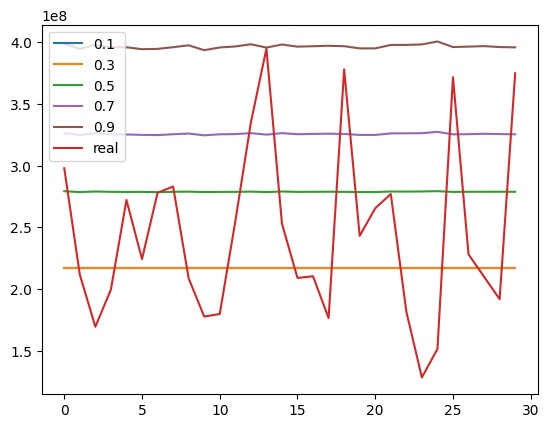

In [26]:
plt.plot(predict_dict[0,:], color = '#1f77b4', label='0.1')
plt.plot(predict_dict[1,:], color = '#ff7f0e', label='0.3')
plt.plot(predict_dict[2,:], color = '#2ca02c', label='0.5')
plt.plot(predict_dict[3,:], color = '#9467bd', label='0.7')
plt.plot(predict_dict[4,:], color = '#8c564b', label='0.9')
plt.plot(test_target_df, color= '#d62728', label='real')
plt.legend()
